In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from tool import local_max, noise, circle, outliers, gaussian, make_histogram_projection, extract_data, get_k_equipartition, gaussian_analysis
import numpy.random as rand
from scipy.optimize import curve_fit
from scipy import integrate
import scipy.constants as cnst
from glob import glob

## Generate nm:px Conversion Ratio

[32.1598 32.2925 32.5363 ... 32.8029 32.8942 32.8164]

pixel sep = 236.8 +/- 0.98 [pixels]
nm/px = 42.23 +/- 0.175 [nm/px]
px/um = 23.68 +/- 0.098 [px/um]


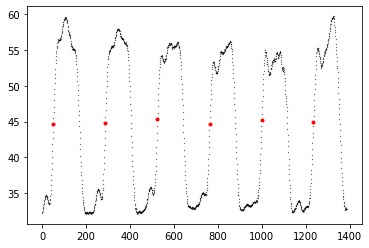

In [2]:
data = np.genfromtxt("/work/data/Calibration2.txt",delimiter='\t', skip_header = 1).T
x_dat = data[0]
y_dat = data[1]
print(y_dat)

maxes, idx = local_max(-np.abs(y_dat-45),N=90)

plt.plot(x_dat,y_dat,"k.",markersize=0.5)
plt.plot(x_dat[idx][::2],y_dat[idx][::2],"r.")
pixel_seperation = np.mean(np.diff(x_dat[idx][::2])) # separation in px
uncert_px = np.std(np.diff(x_dat[idx][::2]))
um_per_px = 10/pixel_seperation
um_per_px_err = (uncert_px/pixel_seperation)*um_per_px

dec = 3
print("\npixel sep =",np.around(pixel_seperation,dec),"+/-",np.around(uncert_px,dec),"[pixels]")

print("nm/px =",np.around(um_per_px*1000,dec),"+/-",np.around(um_per_px_err*1000,dec),"[nm/px]")

print("px/um =",np.around(um_per_px**(-1),dec),"+/-",np.around((um_per_px_err/um_per_px)*um_per_px**(-1),dec),"[px/um]")


## Import Sample D Raw Data

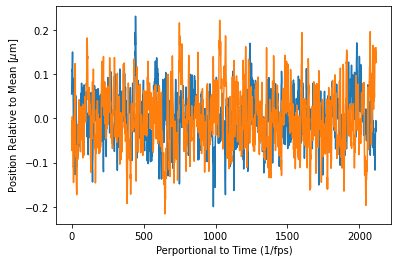

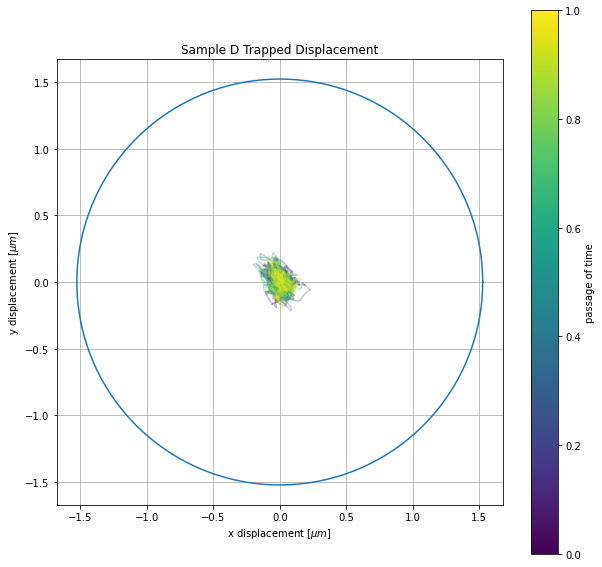

In [3]:
filename = "/work/data/SampleD_trapped2.txt"
data = extract_data(filename, skip_footer = 1200)
x = data.x
y = data.y
rad_dat = data.rad_dat

plt.plot(x,label=r"x position")
plt.plot(y,label=r"y position")
plt.xlabel("Perportional to Time (1/fps)")
plt.ylabel("Position Relative to Mean [$\mu$m]")
plt.show()

fig, ax = plt.subplots(figsize = (10,10))

#no idea how this formatting works
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 

lc = LineCollection(segments, cmap='viridis', alpha = 0.3)
lc.set_array(np.linspace(0,1,len(x)))
line = ax.add_collection(lc)


thetas = np.linspace(0, 2*np.pi, 200)
circle_x, circle_y = circle(thetas, radius = np.mean(rad_dat))
fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax,label = "passage of time")
ax.grid()
ax.plot(circle_x, circle_y)
ax.set(ylabel = "y displacement [$\mu m$]", xlabel = "x displacement [$\mu m$]", title = "Sample D Trapped Displacement",
        aspect = 'equal')

        

x_trapped = x
y_trapped = y



with drift removed std x = 0.0388264215111741
with drift removed std y = 0.04754312345812869


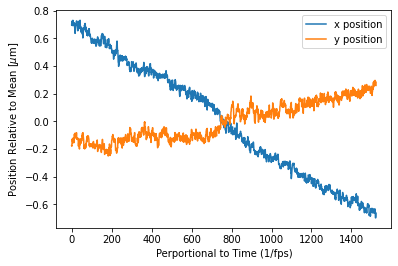

[Text(0, 0.5, 'y displacement [$\\mu m$]'),
 Text(0.5, 0, 'x displacement [$\\mu m$]'),
 Text(0.5, 1.0, 'Sample D Trapped Displacement'),
 None]

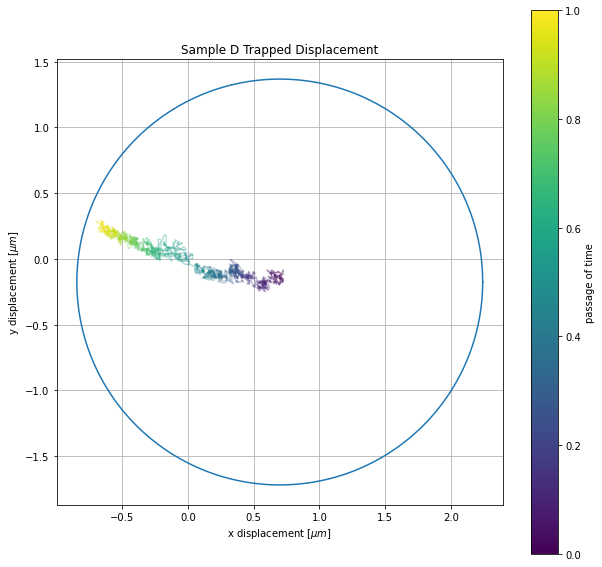

In [21]:
filename = "/work/data/SampleD_stuckBead4.txt"
data = extract_data(filename)
x = data.x_dat - np.mean(data.x_dat)
y = data.y_dat - np.mean(data.y_dat)
rad_dat = data.rad_dat

fitx = np.polynomial.Polynomial.fit(np.arange(0,len(x),1),x, deg = 1)
fity = np.polynomial.Polynomial.fit(np.arange(0,len(x),1),y, deg = 1)
x_no_drift = x - fitx(np.arange(0,len(x),1))
y_no_drift = y - fity(np.arange(0,len(x),1))

print(f"with drift removed std x = {np.std(x_no_drift)}")
print(f"with drift removed std y = {np.std(y_no_drift)}")

plt.plot(x,label=r"x position")
plt.plot(y,label=r"y position")

plt.xlabel("Perportional to Time (1/fps)")
plt.ylabel("Position Relative to Mean [$\mu$m]")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (10,10))

#no idea how this formatting works
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 

lc = LineCollection(segments, cmap='viridis', alpha = 0.3)
lc.set_array(np.linspace(0,1,len(x)))
line = ax.add_collection(lc)


thetas = np.linspace(0, 2*np.pi, 200)
circle_x, circle_y = circle(thetas, radius = np.mean(rad_dat))
circle_x += x[0]
circle_y += y[0]

fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax,label = "passage of time")
ax.grid()
ax.plot(circle_x, circle_y)
ax.set(ylabel = "y displacement [$\mu m$]", xlabel = "x displacement [$\mu m$]", title = "Sample D Trapped Displacement",
        aspect = 'equal')

142 outliers found


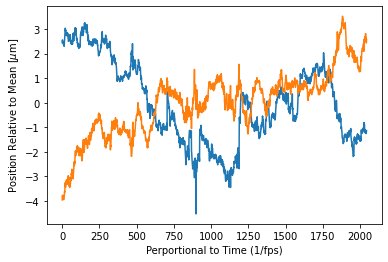

[Text(0, 0.5, 'y displacement [$\\mu m$]'),
 Text(0.5, 0, 'x displacement [$\\mu m$]'),
 Text(0.5, 1.0, 'Sample D Trapped Displacement'),
 None]

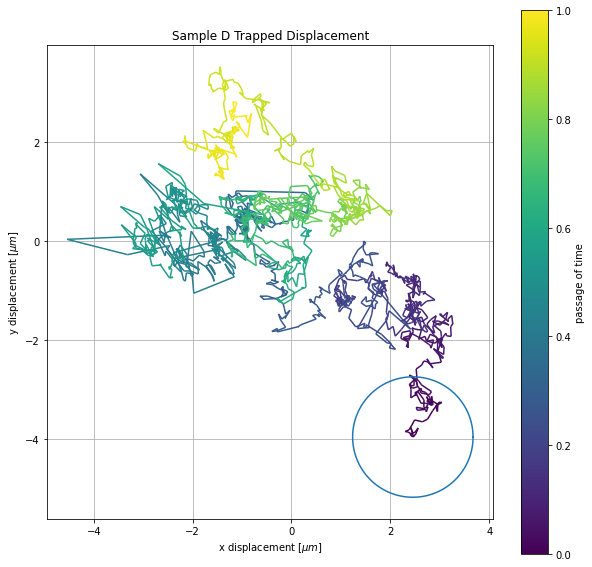

In [22]:
filename = "/work/data/SampleD_loneRandomWalk.txt"
data = extract_data(filename)
x = data.x_dat - np.mean(data.x_dat)
y = data.y_dat - np.mean(data.y_dat)
rad_dat = data.rad_dat

plt.plot(x,label=r"x position")
plt.plot(y,label=r"y position")
plt.xlabel("Perportional to Time (1/fps)")
plt.ylabel("Position Relative to Mean [$\mu$m]")
plt.show()

fig, ax = plt.subplots(figsize = (10,10))

#no idea how this formatting works
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 

lc = LineCollection(segments, cmap='viridis')
lc.set_array(np.linspace(0,1,len(x)))
line = ax.add_collection(lc)


thetas = np.linspace(0, 2*np.pi, 200)
circle_x, circle_y = circle(thetas, radius = np.mean(rad_dat))
circle_x += x[0]
circle_y += y[0]
fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax,label = "passage of time")
ax.grid()
ax.plot(circle_x, circle_y)
ax.set(ylabel = "y displacement [$\mu m$]", xlabel = "x displacement [$\mu m$]", title = "Sample D Trapped Displacement",
        aspect = 'equal')

### Autocorrelation Analysis

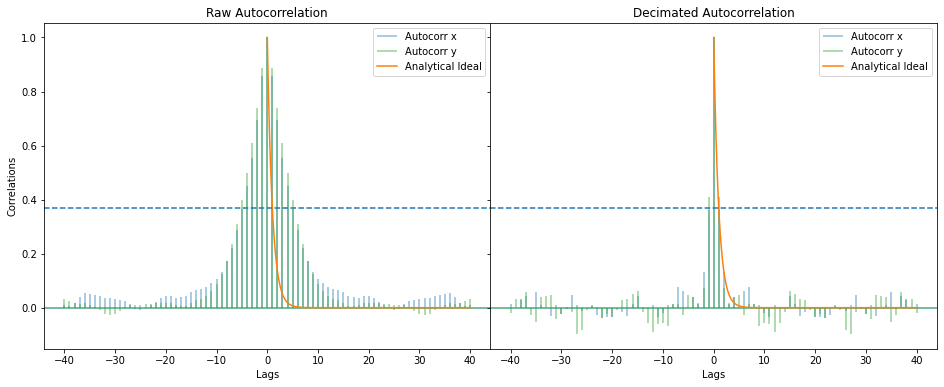

test


In [6]:
fig = plt.figure(figsize = (16,6))
gs = fig.add_gridspec(1,2, hspace=0,wspace = 0)
ax1, ax2 = gs.subplots(sharex=True, sharey=True)
#fig.suptitle('Autocorrelation for Decimation')

# Plot experimental autocorrelation
# I dont know if these are the values we want tho
k = 1
gamma = 1
tau_0 = k/gamma
deltaT = 0.01
D = 1 #= kB T / gamma

x = x_trapped
y = y_trapped

maxLagVal = 40
model = np.linspace(1e-5,maxLagVal,10000)

ax1.acorr(x, maxlags = maxLagVal,label = "Autocorr x",color = "C0",alpha = 0.5)
ax1.acorr(y, maxlags = maxLagVal,label = "Autocorr y",color = "C2",alpha = 0.5)
ax1.plot(model,D*tau_0*np.exp(-np.abs(model)/tau_0),label = "Analytical Ideal",color = "C1")
ax1.axhline(1/np.e,linestyle = "dashed")
ax1.set(title = "Raw Autocorrelation", xlabel = 'Lags', ylabel = "Correlations")
ax1.legend()


# Decimate data
interval = 5
x_dec = x[::interval]
y_dec = y[::interval]
#lol waht happened?
# idk did it shut down?

# Plot decimated autocorrelation
ax2.acorr(x_dec, maxlags = maxLagVal,label = "Autocorr x",color = "C0",alpha = 0.5)
ax2.acorr(y_dec, maxlags = maxLagVal,label = "Autocorr y",color = "C2",alpha = 0.5)
ax2.plot(model,D*tau_0*np.exp(-np.abs(model)/tau_0),label = "Analytical Ideal",color = "C1")
ax2.axhline(1/np.e,linestyle = "dashed")
ax2.legend()
ax2.set(title = "Decimated Autocorrelation",xlabel = "Lags")

plt.show()
print("test")

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

r = np.sum((x-mean_x)*(y-mean_y))/(np.sqrt(np.sum((x - mean_x)**2))*np.sqrt(np.sum((y - mean_y)**2)))

print(f"r = {r}")

r = -0.3385514290403072


### Equipartition Method - Determining k

In [8]:
# Eq 2) U = kx^2/2
# Eq 28) 1/2 k var(disp_from_mean) = 1/d k_b T
# therefore: k = k_b T / var(disp_from_mean)

k_b = cnst.Boltzmann # m^2 kg s-2 K-1
T = 298 # K
var_x = np.var(x_dec/(10**6))
var_y = np.var(y_dec/(10**6))

k_x = k_b*T/(var_x)
k_y = k_b*T/(var_y)

print("Spring Constant in x =",k_x,"[N/m]")
print("Spring Constant in y =",k_y,"[N/m]")

Spring Constant in x = 1.490563763806544e-06 [N/m]
Spring Constant in y = 8.491245832234786e-07 [N/m]


# Gaussian fit method

Via Gaussian Fit Method
k_x = 0.47718455472126237
k_y = 0.5273068843074469
Via equipartition
k_x = 0.4663517870740569
k_y = 0.47906744942805907


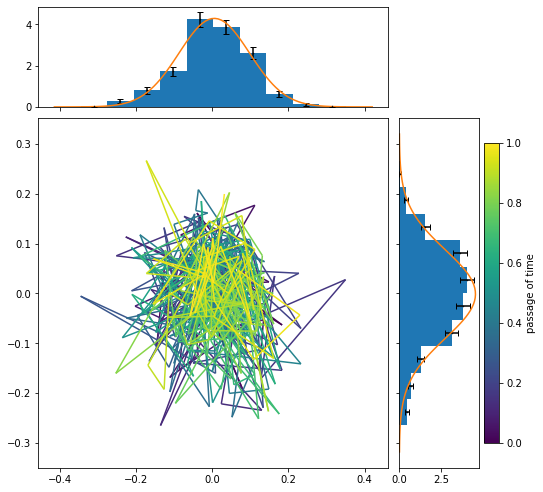

In [9]:
filename = "/work/data/SampleD_trapped1.txt"
ret = extract_data(filename)


analysis2 = make_histogram_projection(ret.x_dec, ret.y_dec, printBool = False)
print(f"Via Gaussian Fit Method\nk_x = {analysis2.k_x}\nk_y = {analysis2.k_y}")

k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
print(f"Via equipartition\nk_x = {k_x}\nk_y = {k_y}")

Via Gaussian Fit Method
k_x = 0.5953940758992894
k_y = 0.1972143838144209


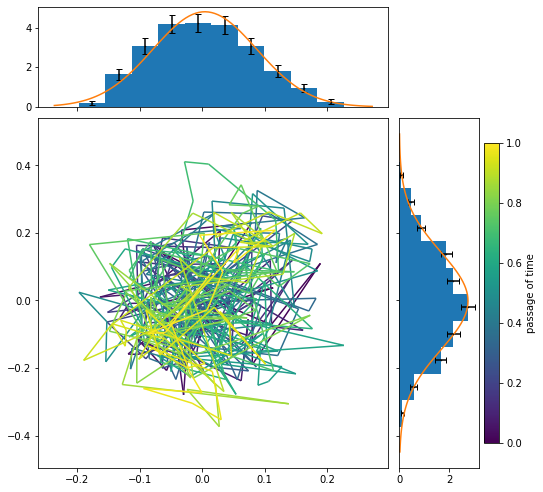

Via equipartition
k_x = 0.6212310144325284
k_y = 0.207863864843128


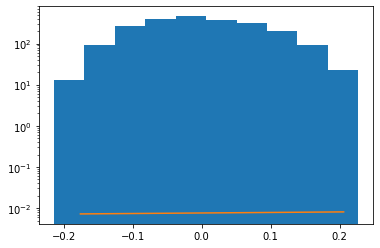

In [62]:
filename = '/work/data/reproducibility/SampleD_reproducibility1_data.txt'
ret = extract_data(filename)



analysis2 = make_histogram_projection(ret.x_dec, ret.y_dec, printBool = False)
print(f"Via Gaussian Fit Method\nk_x = {analysis2.k_x}\nk_y = {analysis2.k_y}")
plt.show()

plt.hist(ret.x,bins=10)
plt.plot(analysis2.,gaussian(analysis2.bins_x,*pOpt))
plt.yscale('log')



k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
print(f"Via equipartition\nk_x = {k_x}\nk_y = {k_y}")

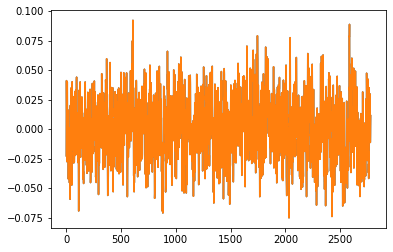

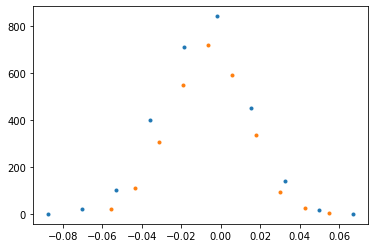

In [77]:
filename1 = '/work/data/reproducibility/StrongRep1.txt'

ret1 = extract_data(filename1)
plt.plot(ret.x)

filename2 = '/work/data/reproducibility/StrongRep4.txt'

ret2 = extract_data(filename2)
plt.plot(ret.x)


plt.show()

x1, bins1 = np.histogram(ret1.x)
x2, bins2 = np.histogram(ret2.x)

plt.plot(bins1[:-1], x1, '.')
plt.plot(bins2[:-1], x2, '.')


<function glob at 0x7f47dceb8b00>


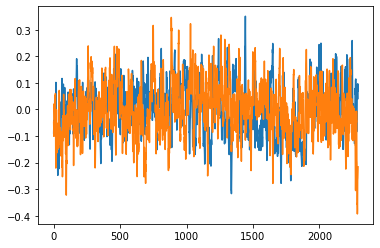

0.012113793697031913


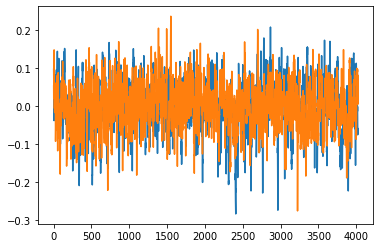

0.05248052028271301


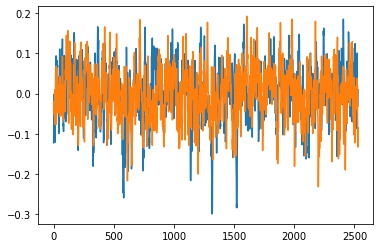

0.0609239975866599


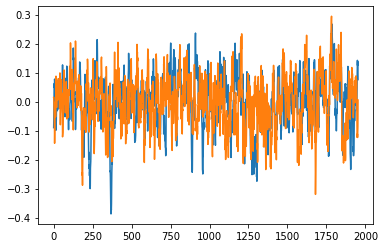

0.03166679044542856


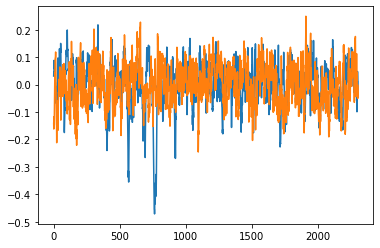

0.036274395836491176


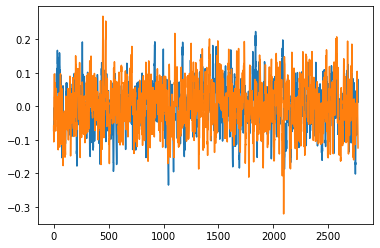

0.04258071167919278


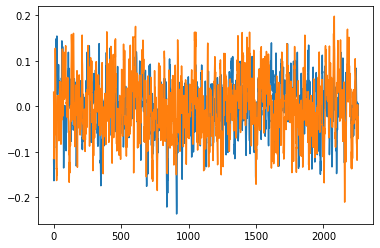

0.07151429456843862


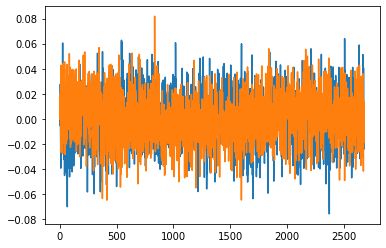

8.19467361627915


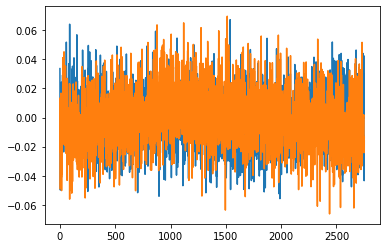

6.723287538357079


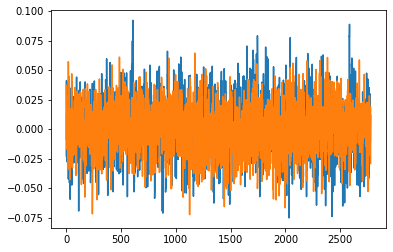

7.455676056760839


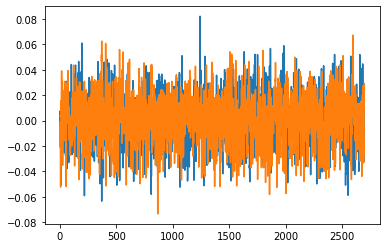

9.534313794989183


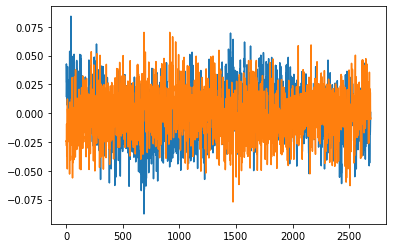

6.653985516916915
Gaussian Method
kx = 4.710011919950649 p/m 4.720081670587025
ky = 4.92036801901623 p/m 4.914012030323065

Equipartition Method
kx = 4.715522022333335 p/m 4.790073423480235
ky = 5.000085175240254 p/m 5.0022760207204815


Text(0.5, 1.0, 'Repeatability Measurments from Sample D')

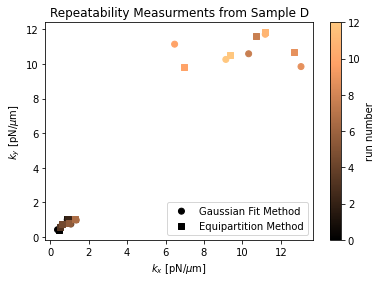

In [66]:
filenames1 = np.sort(glob('data/reproducibility/*[!1-3]_data.txt'))
filenames2 = np.array(glob(('data/reproducibility/Strong*')))
print(glob)
filenames = np.concatenate((filenames1, filenames2))
# print(filenames)

k_arr = []
k_arr_strength_eqi = []
error_arr = []
for filename in filenames:
    ret = extract_data(filename)
    analysis2 = gaussian_analysis(ret.x_dec, ret.y_dec)
    # print(f"Via Gaussian Fit Method\nk_x = {analysis2.k_x}\nk_y = {analysis2.k_y}")
    k_arr.append([analysis2.k_x, analysis2.k_y])
    plt.plot(ret.x)
    plt.plot(ret.y)
    plt.show()
    std_sigma = np.sqrt(np.diag(analysis2.pCov_x))[1]
    sigma = analysis2.pOpt_x[1]
    kx_error = analysis2.k_x*2*k_b*10**18*T/sigma**3*std_sigma

    std_sigma = np.sqrt(np.diag(analysis2.pCov_y))[1]
    sigma = analysis2.pOpt_y[1]
    ky_error = analysis2.k_y*2*k_b*10**18*T/sigma**3*std_sigma
    print(ky_error)
    
    #plt.errorbar(analysis2.k_x, analysis2.k_y, yerr = ky_error, xerr = kx_error, fmt = 'k')

    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])
    

k_arr = np.array(k_arr)
k_arr_strength_eqi = np.array(k_arr_strength_eqi)
print("Gaussian Method")
print(f"kx = {np.mean(k_arr[:,0])} p/m {np.std(k_arr[:,0])}")
print(f"ky = {np.mean(k_arr[:,1])} p/m {np.std(k_arr[:,1])}")

print("\nEquipartition Method")
print(f"kx = {np.mean(k_arr_strength_eqi[:,0])} p/m {np.std(k_arr_strength_eqi[:,0])}")
print(f"ky = {np.mean(k_arr_strength_eqi[:,1])} p/m {np.std(k_arr_strength_eqi[:,1])}")


plt.scatter(k_arr[:,0], k_arr[:,1], marker = 'o',c = np.linspace(0,len(filenames),len(k_arr[:,0])),cmap = 'copper',  label="Gaussian Fit Method")
plt.scatter(k_arr_strength_eqi[:,0], k_arr_strength_eqi[:,1], marker = 's', c = np.linspace(0,len(filenames),len(k_arr[:,0])), cmap  = 'copper', label = "Equipartition Method")


plt.colorbar(label = 'run number')
plt.xlabel(r"$k_x$ [pN/$\mu$m]")
plt.ylabel(r"$k_y$ [pN/$\mu$m]")
plt.legend()
plt.title("Repeatability Measurments from Sample D") # lol

## Trap Strength Analysis (Qualitative)

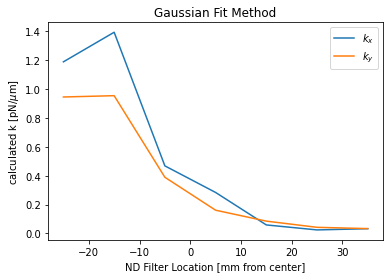

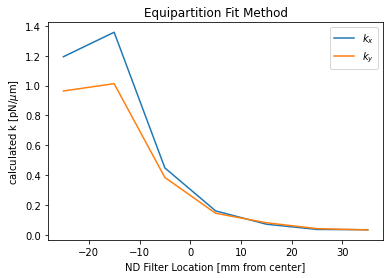

In [12]:
directory = '/work/data/trap_strength/'
filenames = [directory + 'strength1.txt',directory + 'strength2.txt',directory + 'strength3.txt',
    directory + 'strength4.txt',directory + 'strength5.txt',directory + 'strength6.txt',
    directory + 'strength7.txt',]
k_arr_strength_gauss = []
k_arr_strength_eqi = []
ND_arr = np.arange(-25,45,10) # ND marker in mm

for filename in filenames:
    ret = extract_data(filename)
    
    
    analysis2 = gaussian_analysis(ret.x_dec, ret.y_dec)
    
    k_arr_strength_gauss.append([analysis2.k_x, analysis2.k_y])
    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])
    
plt.show()
    

k_arr_strength_gauss = np.array(k_arr_strength_gauss)
k_arr_strength_eqi = np.array(k_arr_strength_eqi)

plt.plot(ND_arr,k_arr_strength_gauss[:,0],label = r"$k_x$")
plt.plot(ND_arr,k_arr_strength_gauss[:,1],label = r"$k_y$")
plt.xlabel("ND Filter Location [mm from center]")
plt.ylabel(r"calculated k [pN/$\mu$m]")
plt.title("Gaussian Fit Method")
plt.legend()
plt.show()

plt.plot(ND_arr,k_arr_strength_eqi[:,0],label = r"$k_x$")
plt.plot(ND_arr,k_arr_strength_eqi[:,1],label = r"$k_y$")
plt.xlabel("ND Filter Location [mm from center]")
plt.ylabel(r"calculated k [pN/$\mu$m]")
plt.title("Equipartition Fit Method")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4bb45f9e-f9d7-4771-843d-2a6451217511' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>